# Import Library

In [1]:
import pandas as pd
import numpy as np 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve

from sklearn.metrics import roc_curve,precision_score,precision_recall_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import pickle,json
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

# Problem statement

In [2]:
# predict the Titanic survival prediction based on feature
#    Independent_feature='PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
#        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'.
#     Dependent_feature='Survived'

## Data Gathering

In [3]:
df=pd.read_csv('titanic.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Gender   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.386083    2.308642   29.699118    0.523008   
std     257.353842    0.487123    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

### Missing value checking

In [6]:
[i for i in df.columns if df[i].isna().sum()>0]

['Age', 'Cabin', 'Embarked']

In [7]:
# herr we got list of nan value feture

In [8]:
df.columns   # all independent feature

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

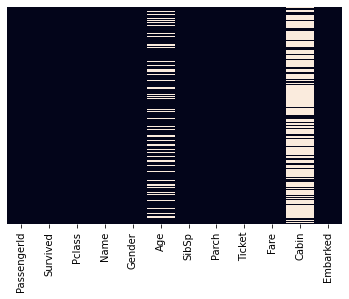

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [10]:
# here also we can see nan vale huge in cabin feature

### Deleting unimportant feature

In [11]:
df=df.drop(['PassengerId','Ticket','Name','Cabin'],axis=1)

In [12]:
df.head(3)

Survived  Pclass  Gender   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S

## get dummies 

In [13]:
df['Gender'].value_counts()

male      577
female    314
Name: Gender, dtype: int64

In [14]:
df=pd.get_dummies(df,columns=['Gender','Embarked'],drop_first=True) 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          714 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Gender_male  891 non-null    uint8  
 7   Embarked_Q   891 non-null    uint8  
 8   Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [16]:
df.head(3)

Survived  Pclass   Age  SibSp  Parch     Fare  Gender_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500            1           0   
1         1       1  38.0      1      0  71.2833            0           0   
2         1       3  26.0      0      0   7.9250            0           0   

   Embarked_S  
0           1  
1           0  
2           1

In [17]:
df.isnull().sum()

Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Gender_male      0
Embarked_Q       0
Embarked_S       0
dtype: int64

### Imputing Nan Value

In [18]:
# by using knn imputer
Knn=KNNImputer()
array=Knn.fit_transform(df)
array

array([[ 0. ,  3. , 22. , ...,  1. ,  0. ,  1. ],
       [ 1. ,  1. , 38. , ...,  0. ,  0. ,  0. ],
       [ 1. ,  3. , 26. , ...,  0. ,  0. ,  1. ],
       ...,
       [ 0. ,  3. , 26.8, ...,  0. ,  0. ,  1. ],
       [ 1. ,  1. , 26. , ...,  1. ,  0. ,  0. ],
       [ 0. ,  3. , 32. , ...,  1. ,  1. ,  0. ]])

In [19]:
df=pd.DataFrame(array,columns=df.columns)
df.head(3)

Survived  Pclass   Age  SibSp  Parch     Fare  Gender_male  Embarked_Q  \
0       0.0     3.0  22.0    1.0    0.0   7.2500          1.0         0.0   
1       1.0     1.0  38.0    1.0    0.0  71.2833          0.0         0.0   
2       1.0     3.0  26.0    0.0    0.0   7.9250          0.0         0.0   

   Embarked_S  
0         1.0  
1         0.0  
2         1.0

In [20]:
df.isna().sum()

Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Gender_male    0
Embarked_Q     0
Embarked_S     0
dtype: int64

### Countplot

<AxesSubplot:xlabel='Gender_male', ylabel='count'>

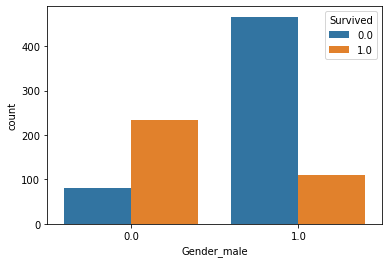

In [21]:
sns.countplot(data=df,x="Gender_male",hue="Survived")# here we can conclude less male survived compare to female

<AxesSubplot:xlabel='count', ylabel='Pclass'>

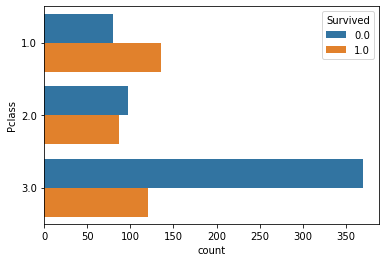

In [22]:
sns.countplot(data=df,y='Pclass',hue='Survived')

In [23]:
# we can say in 3rd class less people survived

<AxesSubplot:xlabel='Age', ylabel='count'>

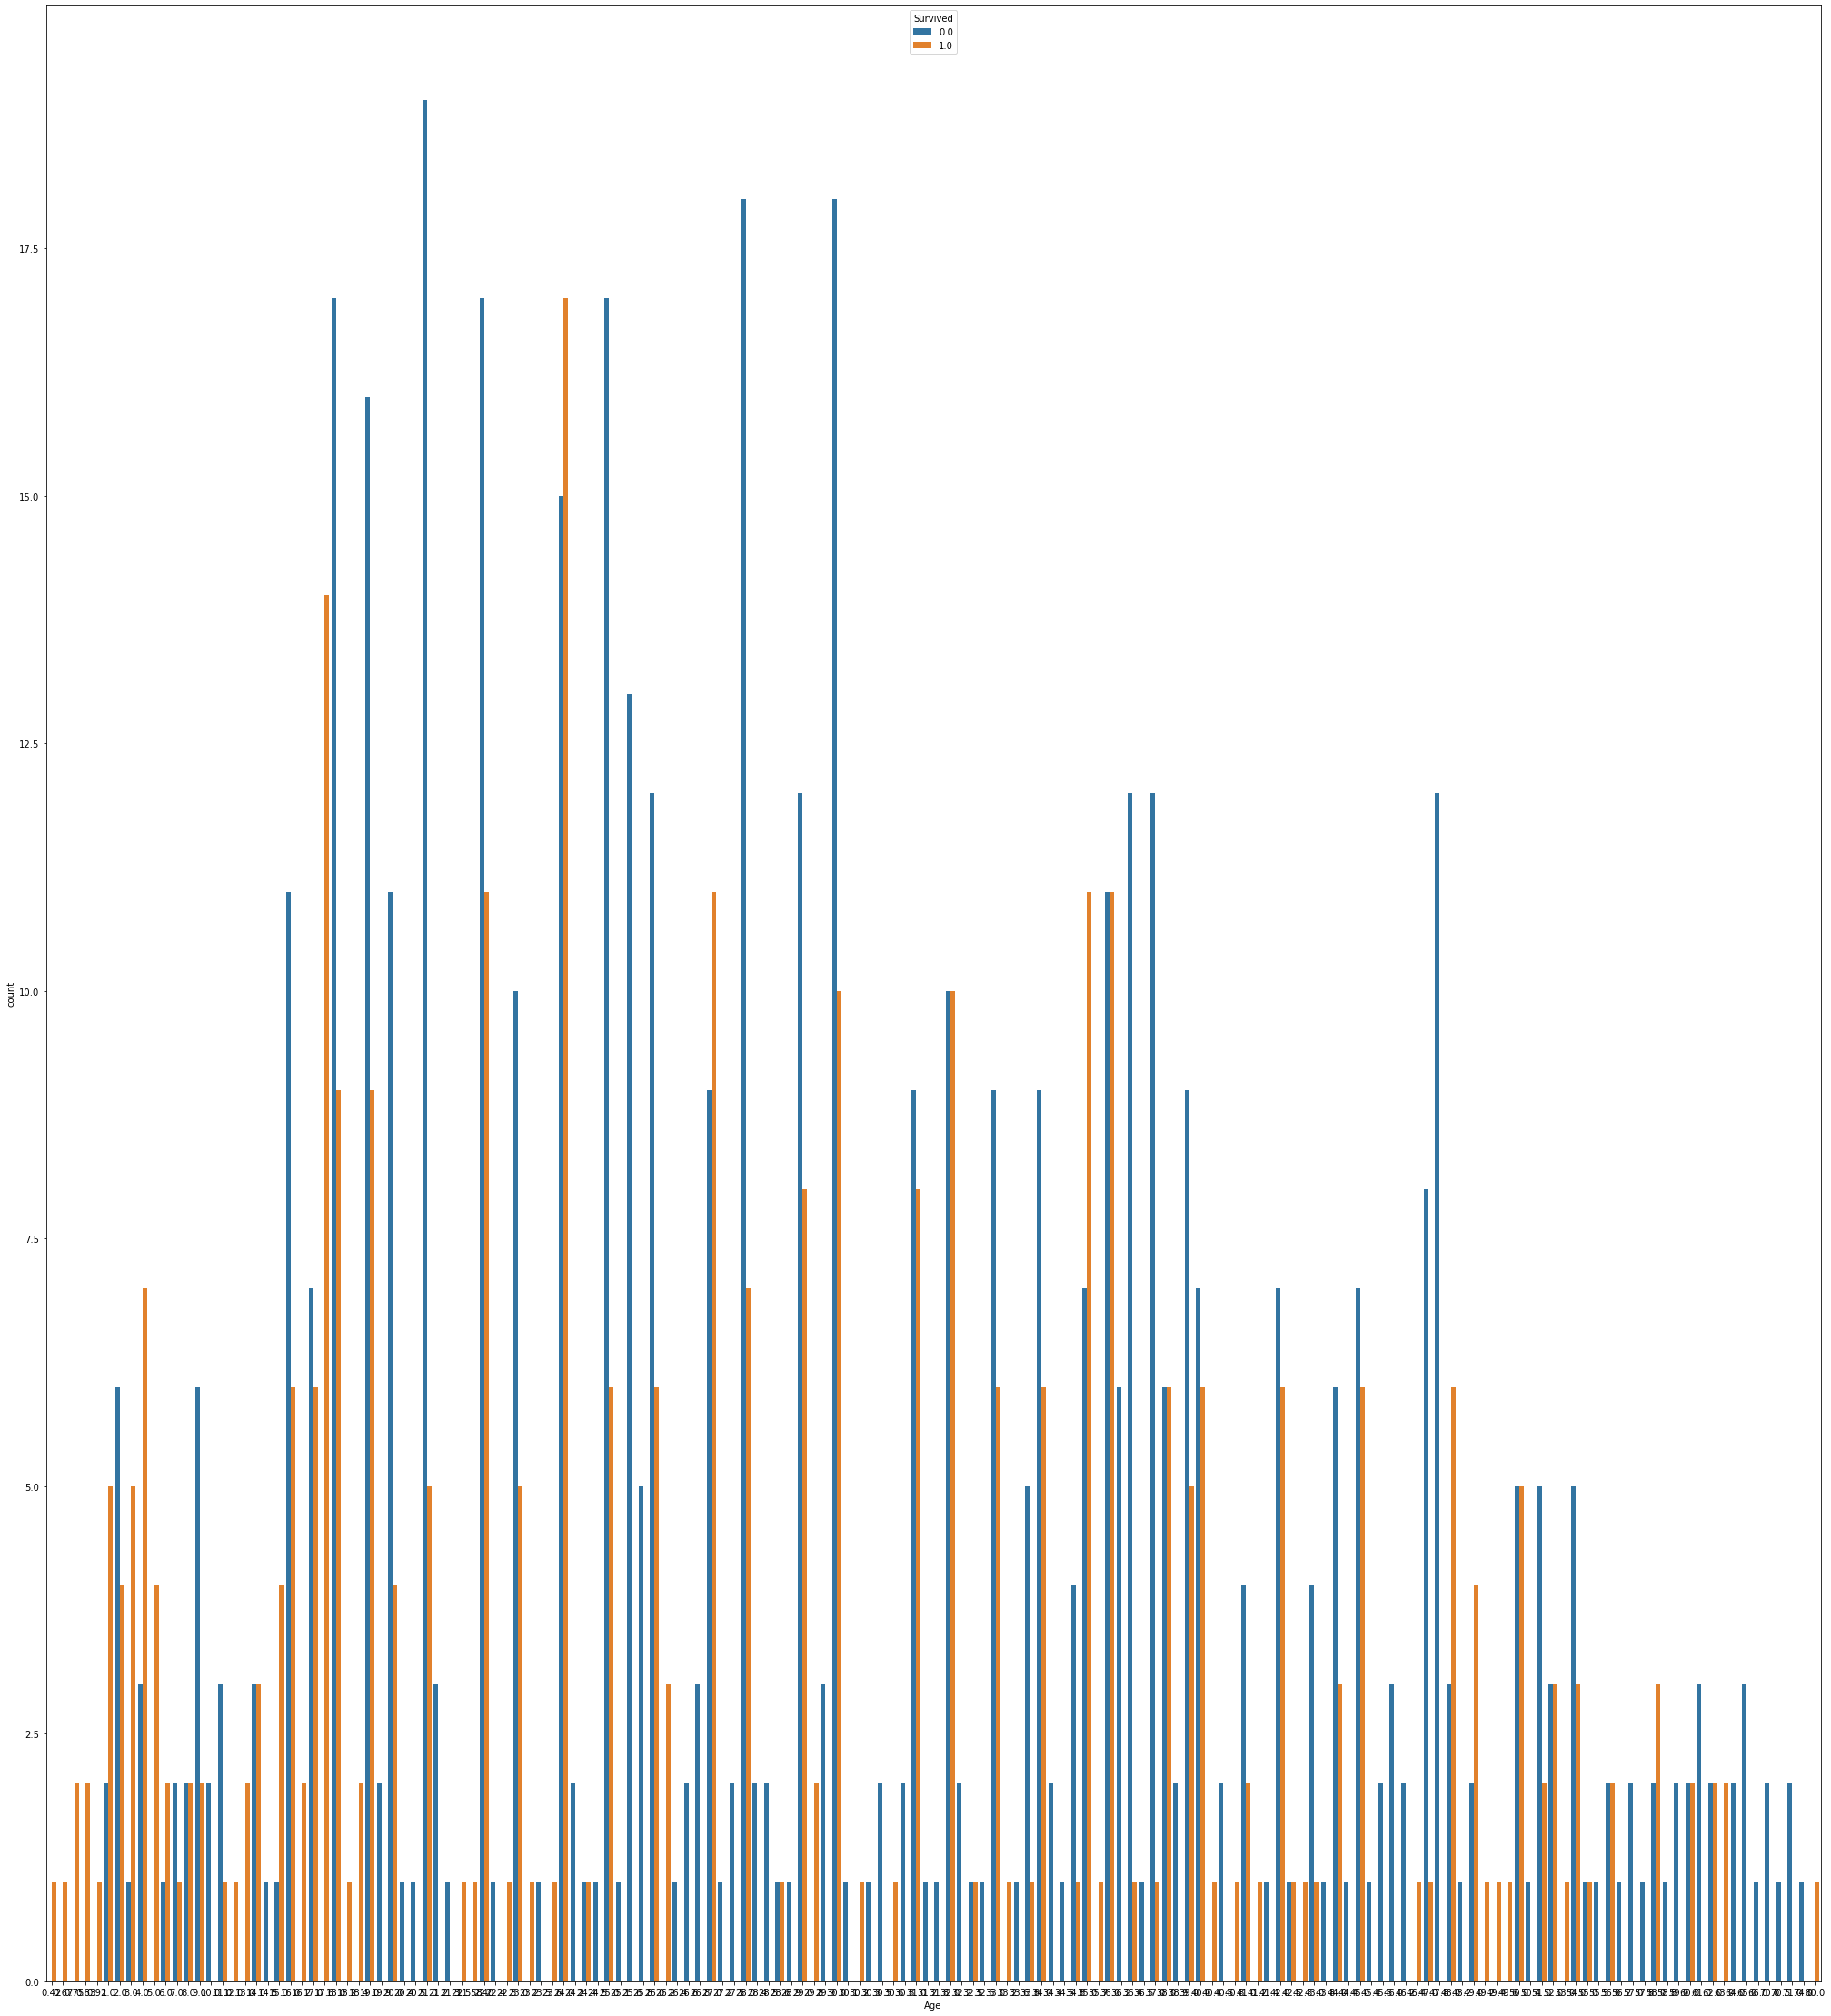

In [24]:
plt.figure(figsize=(35,40))
sns.countplot(data=df,x='Age',hue="Survived")

In [25]:
# insight from this plot that most of the less age people survived 

## Boxplot

<AxesSubplot:>

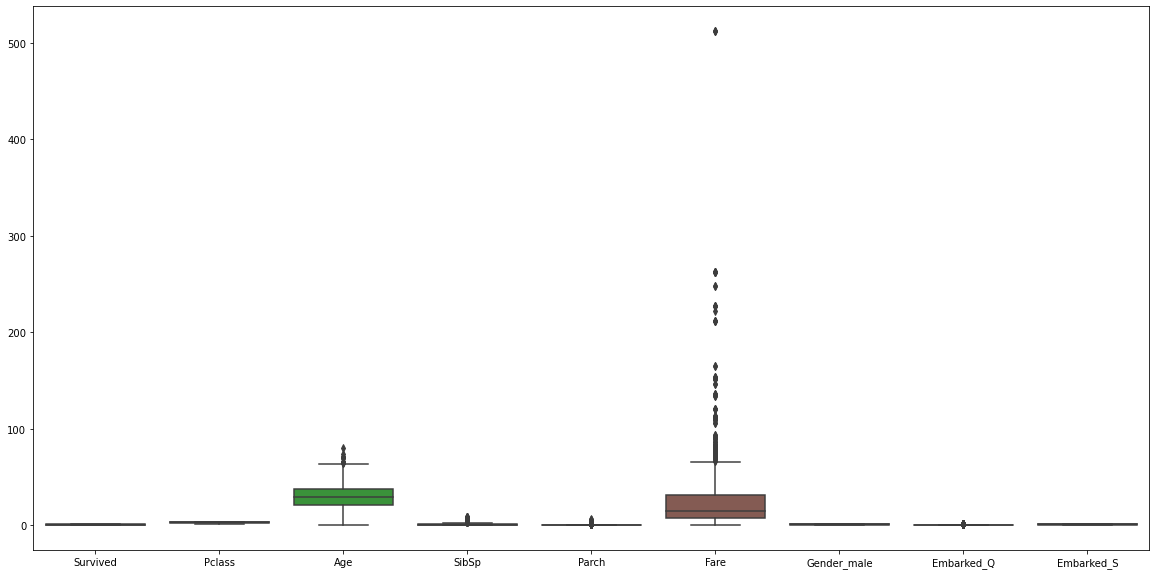

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

In [27]:
# Fare column have some extreme outlier

### Replacing Extreme Outlier

In [28]:
# by using iqr method
q1=df['Fare'].describe()[4]
q3=df['Fare'].describe()[6]
iqr=q3-q1

uf=q3+1.5*(iqr)  # above this range considered as outlier
np.where(df['Fare']>uf) # at this index we have outlier
df.loc[df['Fare']>uf,'Fare']=np.nan# Imputing outlier with Nan value

# again imputing these Nan value by Knn imputer
knn=KNNImputer()
x=knn.fit_transform(df)
df=pd.DataFrame(x,columns=df.columns)
df.head()     # we are succesfully imputed with outlier

Survived  Pclass   Age  SibSp  Parch      Fare  Gender_male  Embarked_Q  \
0       0.0     3.0  22.0    1.0    0.0   7.25000          1.0         0.0   
1       1.0     1.0  38.0    1.0    0.0  31.46832          0.0         0.0   
2       1.0     3.0  26.0    0.0    0.0   7.92500          0.0         0.0   
3       1.0     1.0  35.0    1.0    0.0  53.10000          0.0         0.0   
4       0.0     3.0  35.0    0.0    0.0   8.05000          1.0         0.0   

   Embarked_S  
0         1.0  
1         0.0  
2         1.0  
3         1.0  
4         1.0

In [29]:
df.loc[df["Fare"]>uf]     # so no uf Outlier 

Empty DataFrame
Columns: [Survived, Pclass, Age, SibSp, Parch, Fare, Gender_male, Embarked_Q, Embarked_S]
Index: []

# Scatter Plot

In [30]:
scatter_matrix(df.corr(),grid=True,figsize=(20,20))

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='Gender_male', ylabel='Survived'>,
        <AxesSubplot:xlabel='Embarked_Q', ylabel='Survived'>,
        <AxesSubplot:xlabel='Embarked_S', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Gender_male', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Embarked_Q', ylabel='Pclass'>,
        <AxesSubp

# ViF

<AxesSubplot:>

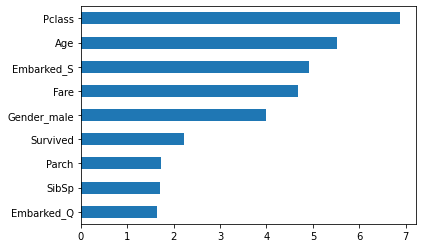

In [31]:
vif=[]
for i in range(df.shape[1]):
    v=variance_inflation_factor(df.to_numpy(),i)
    vif.append(v)
Ser=pd.Series(vif,index=df.columns)
Ser.sort_values().plot(kind='barh')

In [32]:
# So all the feature are not have that much multicollinearity so we keepall feature

### Seprating Dependent and Independent feature

In [33]:
x=df.drop(columns=['Survived'])
y=df['Survived']

# Train Test Split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

# 1. A] Logistic_Model_Training

In [35]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

## 1.1 Testing Evalution

In [36]:
y_pred=log_model.predict(x_test)
con_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_test=accuracy_score(y_test,y_pred)
print('accuracy====',accuracy_test)
print('*'*78)
cls_rep=classification_report(y_test,y_pred)
print('classification report====',cls_rep)
print('*'*78)

confusion matrix-=== [[86 24]
 [20 49]]
******************************************************************************
accuracy==== 0.7541899441340782
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.81      0.78      0.80       110
         1.0       0.67      0.71      0.69        69

    accuracy                           0.75       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.76      0.75      0.76       179

******************************************************************************


## 1.2 Trainning data Evalution

In [37]:
y_predict=log_model.predict(x_train)
con_mat=confusion_matrix(y_train,y_predict)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_train=accuracy_score(y_train,y_predict)
print('accuracy====',accuracy_train)
print('*'*78)
cls_rep=classification_report(y_train,y_predict)
print('classification report====',cls_rep)
print('*'*78)

confusion matrix-=== [[374  63]
 [ 71 204]]
******************************************************************************
accuracy==== 0.8117977528089888
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       437
         1.0       0.76      0.74      0.75       275

    accuracy                           0.81       712
   macro avg       0.80      0.80      0.80       712
weighted avg       0.81      0.81      0.81       712

******************************************************************************


In [38]:
# It is simple model we doesnt apply any hypertunning or scaling still got good accuracy

In [39]:
# logistic_model
result={'accuracy_train':[],'accuracy_test':[]}
index=[]

### 1.3 Plot of Confusion matrix

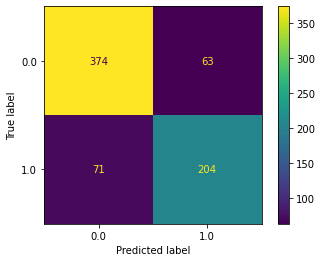

In [40]:
plot_confusion_matrix(log_model,x_train,y_train)

### 1.4 Roc curve

Text(0, 0.5, 'TPR')

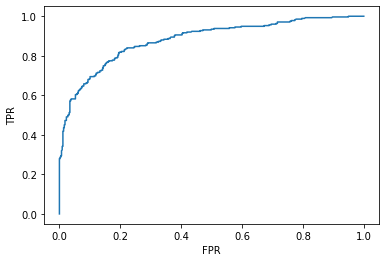

In [41]:
y_pred_proba =log_model.predict_proba(x_train)
fpr,tpr,thresh =roc_curve(y_train,y_pred_proba[:,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

### 1.5 Area under curve

In [42]:
auc = auc(fpr,tpr)
print('Area Under ROC Curve',auc)

Area Under ROC Curve 0.8810651133763261


In [43]:
# basic log model
result['accuracy_train'].append(accuracy_train)
result['accuracy_test'].append(accuracy_test)
index.append('Logistic_model')

# 1.B] Logistic_model With Scaling

### i) Normalization

In [44]:
df1=df.copy()
norm_log_model=MinMaxScaler()
z=norm_log_model.fit_transform(x)
log_model_norm=pd.DataFrame(z,columns=x.columns)
log_model_norm

Pclass       Age  SibSp     Parch      Fare  Gender_male  Embarked_Q  \
0       1.0  0.271174  0.125  0.000000  0.111538          1.0         0.0   
1       0.0  0.472229  0.125  0.000000  0.484128          0.0         0.0   
2       1.0  0.321438  0.000  0.000000  0.121923          0.0         0.0   
3       0.0  0.434531  0.125  0.000000  0.816923          0.0         0.0   
4       1.0  0.434531  0.000  0.000000  0.123846          1.0         0.0   
..      ...       ...    ...       ...       ...          ...         ...   
886     0.5  0.334004  0.000  0.000000  0.200000          1.0         0.0   
887     0.0  0.233476  0.000  0.000000  0.461538          0.0         0.0   
888     1.0  0.331490  0.125  0.333333  0.360769          0.0         0.0   
889     0.0  0.321438  0.000  0.000000  0.461538          1.0         0.0   
890     1.0  0.396833  0.000  0.000000  0.119231          1.0         1.0   

     Embarked_S  
0           1.0  
1           0.0  
2           1.0  
3           1.0  
4           1.0  
..          ...  
886         1.0  
887         1.0  
888         1.0  
889         0.0  
890         0.0  

[891 rows x 8 columns]

In [45]:
# train test for normalize model
x=log_model_norm
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

## 1.6 Logistic_normalized_model_training

In [46]:
log_norm=LogisticRegression()
log_norm.fit(x_train,y_train)

LogisticRegression()

### 1.7 Testing Data evalution for Normalized Logistic_model

In [47]:

y_pred=log_norm.predict(x_test)
con_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_test=accuracy_score(y_test,y_pred)
print('accuracy====',accuracy_test)
print('*'*78)
cls_rep=classification_report(y_test,y_pred)
print('classification report====',cls_rep)
# print('*'*78)

confusion matrix-=== [[88 22]
 [21 48]]
******************************************************************************
accuracy==== 0.7597765363128491
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.81      0.80      0.80       110
         1.0       0.69      0.70      0.69        69

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



### 1.8  Training data evalution Normalization logistic model

In [48]:
y_predict=log_norm.predict(x_train)
con_mat=confusion_matrix(y_train,y_predict)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_train=accuracy_score(y_train,y_predict)
print('accuracy====',accuracy_train)
print('*'*78)
cls_rep=classification_report(y_train,y_predict)
print('classification report====',cls_rep)
# print('*'*78)

confusion matrix-=== [[374  63]
 [ 76 199]]
******************************************************************************
accuracy==== 0.8047752808988764
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       437
         1.0       0.76      0.72      0.74       275

    accuracy                           0.80       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.80      0.80      0.80       712



In [49]:
# here we note that variance is geting reduce and find better balence

In [50]:
result['accuracy_train'].append(accuracy_train)
result['accuracy_test'].append(accuracy_test)
index.append('Logistic_model_with_Normalization')

### ii) Standardization

In [51]:
Standard_log_model=StandardScaler()
Z=Standard_log_model.fit_transform(x)
Standard_Log_Model=pd.DataFrame(Z,columns=x.columns)
Standard_Log_Model

Pclass       Age     SibSp     Parch      Fare  Gender_male  \
0    0.827377 -0.593661  0.432793 -0.473674 -0.894607     0.737695   
1   -1.566107  0.573592  0.432793 -0.473674  0.890827    -1.355574   
2    0.827377 -0.301848 -0.474545 -0.473674 -0.844845    -1.355574   
3   -1.566107  0.354732  0.432793 -0.473674  2.485568    -1.355574   
4    0.827377  0.354732 -0.474545 -0.473674 -0.835629     0.737695   
..        ...       ...       ...       ...       ...          ...   
886 -0.369365 -0.228894 -0.474545 -0.473674 -0.470703     0.737695   
887 -1.566107 -0.812521 -0.474545 -0.473674  0.782579    -1.355574   
888  0.827377 -0.243485  0.432793  2.008933  0.299697    -1.355574   
889 -1.566107 -0.301848 -0.474545 -0.473674  0.782579     0.737695   
890  0.827377  0.135872 -0.474545 -0.473674 -0.857746     0.737695   

     Embarked_Q  Embarked_S  
0     -0.307562    0.619306  
1     -0.307562   -1.614710  
2     -0.307562    0.619306  
3     -0.307562    0.619306  
4     -0.307562    0.619306  
..          ...         ...  
886   -0.307562    0.619306  
887   -0.307562    0.619306  
888   -0.307562    0.619306  
889   -0.307562   -1.614710  
890    3.251373   -1.614710  

[891 rows x 8 columns]

In [52]:
# train test for std  model
x=Standard_Log_Model
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

## 1.9 Logistic_standardized_model_training

In [53]:
log_std_model=LogisticRegression()
log_std_model.fit(x_train,y_train)

LogisticRegression()

### 1.10 Testing evalution logistic standardized model

In [54]:
y_pred=log_std_model.predict(x_test)
con_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_train=accuracy_score(y_test,y_pred)
print('accuracy====',accuracy_train)
print('*'*78)
cls_rep=classification_report(y_test,y_pred)
print('classification report====',cls_rep)
# print('*'*78)

confusion matrix-=== [[86 24]
 [19 50]]
******************************************************************************
accuracy==== 0.7597765363128491
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.82      0.78      0.80       110
         1.0       0.68      0.72      0.70        69

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



### 1.11 Training evalution logistic standardized model

In [55]:
y_predict=log_std_model.predict(x_train)
con_mat=confusion_matrix(y_train,y_predict)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_train=accuracy_score(y_train,y_predict)
print('accuracy====',accuracy_train)
print('*'*78)
cls_rep=classification_report(y_train,y_predict)
print('classification report====',cls_rep)
# print('*'*78)

confusion matrix-=== [[375  62]
 [ 72 203]]
******************************************************************************
accuracy==== 0.8117977528089888
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       437
         1.0       0.77      0.74      0.75       275

    accuracy                           0.81       712
   macro avg       0.80      0.80      0.80       712
weighted avg       0.81      0.81      0.81       712



In [56]:
result['accuracy_train'].append(accuracy_train)
result['accuracy_test'].append(accuracy_test)
index.append('Logistic_model_with_Standardization')

# 2. A] KNN Model 

In [57]:
x=df.drop('Survived',axis=1)
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [58]:
knn=KNeighborsClassifier().fit(x_train,y_train)

### 2.1 Testing data evalution

In [59]:
y_pred=knn.predict(x_test)
con_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_test=accuracy_score(y_test,y_pred)
print('accuracy====',accuracy_test)
print('*'*78)
cls_rep=classification_report(y_test,y_pred)
print('classification report====',cls_rep)
print('*'*78)

confusion matrix-=== [[78 32]
 [30 39]]
******************************************************************************
accuracy==== 0.6536312849162011
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.72      0.71      0.72       110
         1.0       0.55      0.57      0.56        69

    accuracy                           0.65       179
   macro avg       0.64      0.64      0.64       179
weighted avg       0.66      0.65      0.65       179

******************************************************************************


### 2.2 Training data evalution

In [60]:
y_predict=knn.predict(x_train)
con_mat=confusion_matrix(y_train,y_predict)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_train=accuracy_score(y_train,y_predict)
print('accuracy====',accuracy_train)
print('*'*78)
cls_rep=classification_report(y_train,y_predict)
print('classification report====',cls_rep)
print('*'*78)

confusion matrix-=== [[383  54]
 [ 86 189]]
******************************************************************************
accuracy==== 0.8033707865168539
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       437
         1.0       0.78      0.69      0.73       275

    accuracy                           0.80       712
   macro avg       0.80      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712

******************************************************************************


In [61]:
### model overfit here but we havent apply anything here

In [62]:
#knn simple model
result['accuracy_train'].append(accuracy_train)
result['accuracy_test'].append(accuracy_test)
index.append('KNN_simple_model')

## 2.3 KNN hypertunning

In [63]:
Knn=KNeighborsClassifier()
hyperparameter={'n_neighbors':np.arange(3,30),
                'weights':['uniform','distance'],
                'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
                'leaf_size':np.arange(20,40),
                'p':[1,2]}
knn_random_model=RandomizedSearchCV(Knn,hyperparameter,cv=5)
knn_random_model.fit(x_train,y_train)
knn_random_model.best_estimator_

KNeighborsClassifier(leaf_size=38, n_neighbors=29, p=1, weights='distance')

### 2.4 KNN Testing Evalution With Hypertunning

In [64]:
KNN=knn_random_model.best_estimator_
y_pred=KNN.predict(x_test)
con_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_test=accuracy_score(y_test,y_pred)
print('accuracy====',accuracy_test)
print('*'*78)
cls_rep=classification_report(y_test,y_pred)
print('classification report====',cls_rep)
# print('*'*78)

confusion matrix-=== [[79 31]
 [24 45]]
******************************************************************************
accuracy==== 0.6927374301675978
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.77      0.72      0.74       110
         1.0       0.59      0.65      0.62        69

    accuracy                           0.69       179
   macro avg       0.68      0.69      0.68       179
weighted avg       0.70      0.69      0.70       179



### 2.5 KNN Training Evalution With Hypertunning

In [65]:
y_predict=KNN.predict(x_train)
con_mat=confusion_matrix(y_train,y_predict)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_train=accuracy_score(y_train,y_predict)
print('accuracy====',accuracy_train)
print('*'*78)
cls_rep=classification_report(y_train,y_predict)
print('classification report====',cls_rep)
print('*'*78)

confusion matrix-=== [[437   0]
 [  7 268]]
******************************************************************************
accuracy==== 0.9901685393258427
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       437
         1.0       1.00      0.97      0.99       275

    accuracy                           0.99       712
   macro avg       0.99      0.99      0.99       712
weighted avg       0.99      0.99      0.99       712

******************************************************************************


In [66]:
# here again hypertunning not work good 

In [67]:
#knn_simple_with_hyp
result['accuracy_train'].append(accuracy_train)
result['accuracy_test'].append(accuracy_test)
index.append('KNN_simple_model_with_hyp(rscv)')

## 2.B] KNN feature scaling

### i) Standardization

In [68]:
std_knn=StandardScaler()
Arr=std_knn.fit_transform(x)
std_knn_model=pd.DataFrame(Arr,columns=x.columns)
std_knn_model

Pclass       Age     SibSp     Parch      Fare  Gender_male  \
0    0.827377 -0.593661  0.432793 -0.473674 -0.894607     0.737695   
1   -1.566107  0.573592  0.432793 -0.473674  0.890827    -1.355574   
2    0.827377 -0.301848 -0.474545 -0.473674 -0.844845    -1.355574   
3   -1.566107  0.354732  0.432793 -0.473674  2.485568    -1.355574   
4    0.827377  0.354732 -0.474545 -0.473674 -0.835629     0.737695   
..        ...       ...       ...       ...       ...          ...   
886 -0.369365 -0.228894 -0.474545 -0.473674 -0.470703     0.737695   
887 -1.566107 -0.812521 -0.474545 -0.473674  0.782579    -1.355574   
888  0.827377 -0.243485  0.432793  2.008933  0.299697    -1.355574   
889 -1.566107 -0.301848 -0.474545 -0.473674  0.782579     0.737695   
890  0.827377  0.135872 -0.474545 -0.473674 -0.857746     0.737695   

     Embarked_Q  Embarked_S  
0     -0.307562    0.619306  
1     -0.307562   -1.614710  
2     -0.307562    0.619306  
3     -0.307562    0.619306  
4     -0.307562    0.619306  
..          ...         ...  
886   -0.307562    0.619306  
887   -0.307562    0.619306  
888   -0.307562    0.619306  
889   -0.307562   -1.614710  
890    3.251373   -1.614710  

[891 rows x 8 columns]

In [69]:
x=std_knn_model
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

## 2.6 Knn standardized model training

In [70]:
Std_knn_model=KNeighborsClassifier()
Std_knn_model.fit(x_train,y_train)

KNeighborsClassifier()

### 2.7 Knn standardized model testing evalution

In [71]:
y_pred=Std_knn_model.predict(x_test)
con_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_test=accuracy_score(y_test,y_pred)
print('accuracy====',accuracy_test)
print('*'*78)
cls_rep=classification_report(y_test,y_pred)
print('classification report====',cls_rep)
# print('*'*78)

confusion matrix-=== [[88 22]
 [17 52]]
******************************************************************************
accuracy==== 0.7821229050279329
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.84      0.80      0.82       110
         1.0       0.70      0.75      0.73        69

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.78      0.78       179



### 2.8 Knn standardized model training evalution

In [72]:
y_predict=Std_knn_model.predict(x_train)
con_mat=confusion_matrix(y_train,y_predict)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_train=accuracy_score(y_train,y_predict)
print('accuracy====',accuracy_train)
print('*'*78)
cls_rep=classification_report(y_train,y_predict)
print('classification report====',cls_rep)
print('*'*78)

confusion matrix-=== [[395  42]
 [ 53 222]]
******************************************************************************
accuracy==== 0.8665730337078652
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       437
         1.0       0.84      0.81      0.82       275

    accuracy                           0.87       712
   macro avg       0.86      0.86      0.86       712
weighted avg       0.87      0.87      0.87       712

******************************************************************************


In [73]:
# knn_std_model
result['accuracy_train'].append(accuracy_train)
result['accuracy_test'].append(accuracy_test)
index.append('KNN_Standardized_Model')

## 2.9 knn standardized model with hypertunning

In [74]:
knn_std_hyp=KNeighborsClassifier()
hyperparameter={'n_neighbors':np.arange(1,15),
                'p':[1,2]}
grid_std_model=GridSearchCV(knn_std_hyp,hyperparameter,cv=5)
grid_std_model.fit(x_train,y_train)
grid_std_model.best_estimator_

KNeighborsClassifier(n_neighbors=14, p=1)

### 2.10 Testing evalution knn standardized model with hyperpartunning

In [75]:
knn_std_hyp=KNeighborsClassifier(n_neighbors=14, p=1)
knn_std_hyp.fit(x_train,y_train)
y_pred=knn_std_hyp.predict(x_test)
con_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_test=accuracy_score(y_test,y_pred)
print('accuracy====',accuracy_test)
print('*'*78)
cls_rep=classification_report(y_test,y_pred)
print('classification report====',cls_rep)
# print('*'*78)

confusion matrix-=== [[97 13]
 [24 45]]
******************************************************************************
accuracy==== 0.7932960893854749
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       110
         1.0       0.78      0.65      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



### 2.11 Training evalution knn standardized model with hypertunning

In [76]:
y_predict=knn_std_hyp.predict(x_train)
con_mat=confusion_matrix(y_train,y_predict)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_train=accuracy_score(y_train,y_predict)
print('accuracy====',accuracy_train)
print('*'*78)
cls_rep=classification_report(y_train,y_predict)
print('classification report====',cls_rep)
print('*'*78)

confusion matrix-=== [[411  26]
 [ 82 193]]
******************************************************************************
accuracy==== 0.848314606741573
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.83      0.94      0.88       437
         1.0       0.88      0.70      0.78       275

    accuracy                           0.85       712
   macro avg       0.86      0.82      0.83       712
weighted avg       0.85      0.85      0.84       712

******************************************************************************


### 2.12 Kvalue For training and testing

Text(0.5, 1.0, 'Comparision Between Train ANd Test Accuracies')

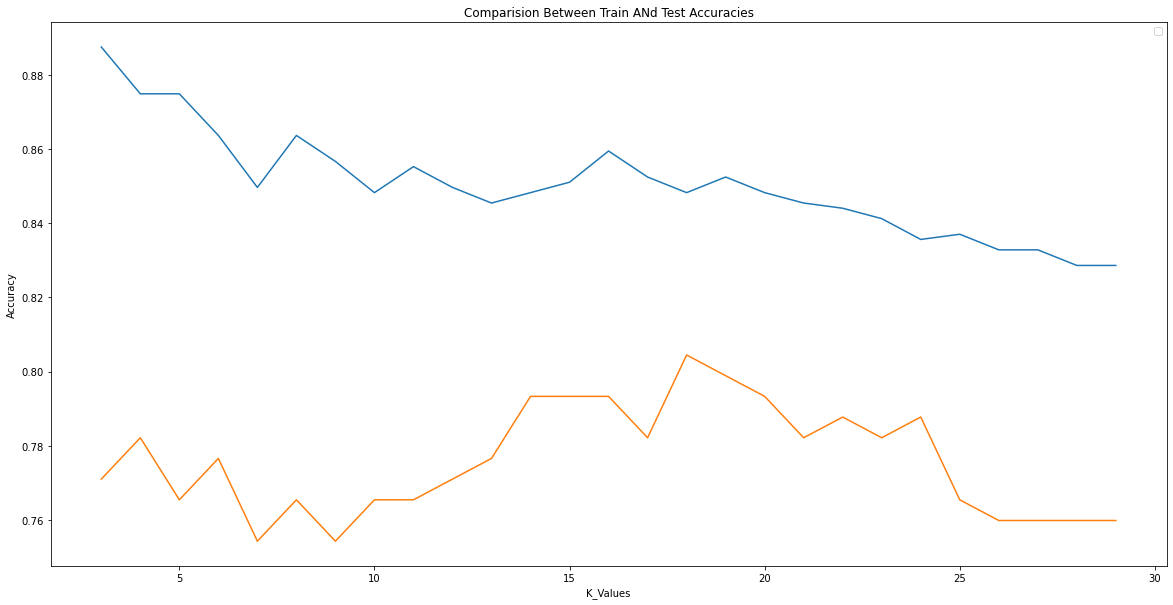

In [77]:
r2_train_list= []
r2_test_list = []
k_values=range(3,30)
for k in k_values:
    knn_clf=KNeighborsClassifier(n_neighbors=k,p=1)
    knn_clf.fit(x_train,y_train)
    r2_train=knn_clf.score(x_train,y_train)
    r2_train_list.append(r2_train)
    
    r2_test=knn_clf.score(x_test,y_test)
    r2_test_list.append(r2_test)

plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)
plt.legend(r2_train_list,r2_test_list)
plt.xlabel("K_Values")
plt.ylabel("Accuracy")
plt.title("Comparision Between Train ANd Test Accuracies")

In [78]:
# knn std with hyp
result['accuracy_train'].append(accuracy_train)
result['accuracy_test'].append(accuracy_test)
index.append('KNN_Standardized_Model_with_hyp(gcv)')

## ii] KNN Normalization Model

In [79]:
knn_norm_model=MinMaxScaler()
Arr=knn_norm_model.fit_transform(x)
norm_knn_model=pd.DataFrame(Arr,columns=x.columns)
norm_knn_model

Pclass       Age  SibSp     Parch      Fare  Gender_male  Embarked_Q  \
0       1.0  0.271174  0.125  0.000000  0.111538          1.0         0.0   
1       0.0  0.472229  0.125  0.000000  0.484128          0.0         0.0   
2       1.0  0.321438  0.000  0.000000  0.121923          0.0         0.0   
3       0.0  0.434531  0.125  0.000000  0.816923          0.0         0.0   
4       1.0  0.434531  0.000  0.000000  0.123846          1.0         0.0   
..      ...       ...    ...       ...       ...          ...         ...   
886     0.5  0.334004  0.000  0.000000  0.200000          1.0         0.0   
887     0.0  0.233476  0.000  0.000000  0.461538          0.0         0.0   
888     1.0  0.331490  0.125  0.333333  0.360769          0.0         0.0   
889     0.0  0.321438  0.000  0.000000  0.461538          1.0         0.0   
890     1.0  0.396833  0.000  0.000000  0.119231          1.0         1.0   

     Embarked_S  
0           1.0  
1           0.0  
2           1.0  
3           1.0  
4           1.0  
..          ...  
886         1.0  
887         1.0  
888         1.0  
889         0.0  
890         0.0  

[891 rows x 8 columns]

In [80]:
x=norm_knn_model
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

### 2.12 Testing evalution of knn normalized model

In [81]:
knn_norm_model=KNeighborsClassifier()
knn_norm_model.fit(x_train,y_train)
y_pred=knn_std_hyp.predict(x_test)
con_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_test=accuracy_score(y_test,y_pred)
print('accuracy====',accuracy_test)
print('*'*78)
cls_rep=classification_report(y_test,y_pred)
print('classification report====',cls_rep)
# print('*'*78)

confusion matrix-=== [[110   0]
 [ 69   0]]
******************************************************************************
accuracy==== 0.6145251396648045
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       110
         1.0       0.00      0.00      0.00        69

    accuracy                           0.61       179
   macro avg       0.31      0.50      0.38       179
weighted avg       0.38      0.61      0.47       179



### 2.13 Training evalution of knn normalized model

In [82]:
y_predict=knn_norm_model.predict(x_train)
con_mat=confusion_matrix(y_train,y_predict)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_train=accuracy_score(y_train,y_predict)
print('accuracy====',accuracy_train)
print('*'*78)
cls_rep=classification_report(y_train,y_predict)
print('classification report====',cls_rep)
print('*'*78)

confusion matrix-=== [[395  42]
 [ 56 219]]
******************************************************************************
accuracy==== 0.8623595505617978
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89       437
         1.0       0.84      0.80      0.82       275

    accuracy                           0.86       712
   macro avg       0.86      0.85      0.85       712
weighted avg       0.86      0.86      0.86       712

******************************************************************************


In [83]:
# knn norm model
result['accuracy_train'].append(accuracy_train)
result['accuracy_test'].append(accuracy_test)
index.append('KNN_Normalized_Model')

## 2.14 knn normalized with hypertunning

In [84]:
knn_norm_hyp=KNeighborsClassifier()
hyperparameter={'n_neighbors':np.arange(3,17),
               'p':[1,2],
               'weights':['unifrom','distance']}
knn_norm_grid=GridSearchCV(knn_norm_hyp,hyperparameter,cv=5)
knn_norm_grid.fit(x_train,y_train)
knn_norm_grid.best_estimator_

KNeighborsClassifier(n_neighbors=7, weights='distance')

###  2.15 Testing evalution knn normalized model with hypertunning 

In [85]:
knn_norm_hyp=knn_norm_grid.best_estimator_
y_pred=knn_norm_hyp.predict(x_test)

con_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_test=accuracy_score(y_test,y_pred)
print('accuracy====',accuracy_test)
print('*'*78)
cls_rep=classification_report(y_test,y_pred)
print('classification report====',cls_rep)
# print('*'*78)

confusion matrix-=== [[87 23]
 [18 51]]
******************************************************************************
accuracy==== 0.770949720670391
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.83      0.79      0.81       110
         1.0       0.69      0.74      0.71        69

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.77      0.77      0.77       179



### 2.16 Training evalution knn normalized model with hypertunning 

In [86]:
y_predict=knn_norm_hyp.predict(x_train)
con_mat=confusion_matrix(y_train,y_predict)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_train=accuracy_score(y_train,y_predict)
print('accuracy====',accuracy_train)
print('*'*78)
cls_rep=classification_report(y_train,y_predict)
print('classification report====',cls_rep)
print('*'*78)

confusion matrix-=== [[437   0]
 [  7 268]]
******************************************************************************
accuracy==== 0.9901685393258427
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       437
         1.0       1.00      0.97      0.99       275

    accuracy                           0.99       712
   macro avg       0.99      0.99      0.99       712
weighted avg       0.99      0.99      0.99       712

******************************************************************************


In [87]:
# knn norm with hyp
result['accuracy_train'].append(accuracy_train)
result['accuracy_test'].append(accuracy_test)
index.append('KNN_Normalized_Model_with_hypertunning')

# 3 A] Decision Tree Model

In [88]:
x=df.drop('Survived',axis=1)
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.26,random_state=42,stratify=y)

## 3.1 Model Training of Decision tree

In [89]:
dec_tree_model=DecisionTreeClassifier().fit(x_train,y_train)

### 3.2 testing data evalution of decision tree

In [90]:
y_pred=dec_tree_model.predict(x_test)

con_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_test=accuracy_score(y_test,y_pred)
print('accuracy====',accuracy_test)
print('*'*78)
cls_rep=classification_report(y_test,y_pred)
print('classification report====',cls_rep)
# print('*'*78)

confusion matrix-=== [[114  28]
 [ 24  66]]
******************************************************************************
accuracy==== 0.7758620689655172
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.83      0.80      0.81       142
         1.0       0.70      0.73      0.72        90

    accuracy                           0.78       232
   macro avg       0.76      0.77      0.77       232
weighted avg       0.78      0.78      0.78       232



### 3.3 training data evalution of decision tree

In [91]:
y_predict=dec_tree_model.predict(x_train)
con_mat=confusion_matrix(y_train,y_predict)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_train=accuracy_score(y_train,y_predict)
print('accuracy====',accuracy_train)
print('*'*78)
cls_rep=classification_report(y_train,y_predict)
print('classification report====',cls_rep)

confusion matrix-=== [[405   0]
 [  6 248]]
******************************************************************************
accuracy==== 0.9908952959028832
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       405
         1.0       1.00      0.98      0.99       254

    accuracy                           0.99       659
   macro avg       0.99      0.99      0.99       659
weighted avg       0.99      0.99      0.99       659



In [92]:
# dec tree model
result['accuracy_train'].append(accuracy_train)
result['accuracy_test'].append(accuracy_test)
index.append('Decision tree model')

## 3.4 Decision tree with hypertunning

In [93]:
dec_tree_hyp=DecisionTreeClassifier()
hyperparameter={'criterion':['gini','entropy'],
                'max_depth':np.arange(1,30),
                'min_samples_split':np.arange(1,30),
                'min_samples_leaf':np.arange(1,30)}
dec_rand_model=RandomizedSearchCV(dec_tree_hyp,hyperparameter,cv=5)
dec_rand_model.fit(x_train,y_train)
dec_rand_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=19, min_samples_leaf=6,
                       min_samples_split=4)

### 3.5 Testing data evalution decision tree with hyperparameter

In [94]:
dec_tree_hyp=dec_rand_model.best_estimator_
y_pred=dec_tree_hyp.predict(x_test)

con_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_test=accuracy_score(y_test,y_pred)
print('accuracy====',accuracy_test)
print('*'*78)
cls_rep=classification_report(y_test,y_pred)
print('classification report====',cls_rep)


confusion matrix-=== [[117  25]
 [ 22  68]]
******************************************************************************
accuracy==== 0.7974137931034483
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.84      0.82      0.83       142
         1.0       0.73      0.76      0.74        90

    accuracy                           0.80       232
   macro avg       0.79      0.79      0.79       232
weighted avg       0.80      0.80      0.80       232



### 3.6 training data evalution decision tree with hypertunning

In [95]:
y_predict=dec_tree_hyp.predict(x_train)
con_mat=confusion_matrix(y_train,y_predict)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_train=accuracy_score(y_train,y_predict)
print('accuracy====',accuracy_train)
print('*'*78)
cls_rep=classification_report(y_train,y_predict)
print('classification report====',cls_rep)

confusion matrix-=== [[380  25]
 [ 48 206]]
******************************************************************************
accuracy==== 0.8892261001517451
******************************************************************************
classification report====               precision    recall  f1-score   support

         0.0       0.89      0.94      0.91       405
         1.0       0.89      0.81      0.85       254

    accuracy                           0.89       659
   macro avg       0.89      0.87      0.88       659
weighted avg       0.89      0.89      0.89       659



### 3.7 plot tree

In [96]:
plt.figure(figsize=(189,154))
plot_tree(dec_tree_hyp, feature_names=x.columns, class_names=['0','1'],filled=True)
plt.savefig('Decision_Tree_with_HYP.jpg')

In [97]:
# dec tree with hyp
result['accuracy_train'].append(accuracy_train)
result['accuracy_test'].append(accuracy_test)
index.append('Decision tree model_with hyp(rscv)')

# 4. Random Forest

In [98]:
df['Survived'].replace({0.0:'No',1.0:'Yes'},inplace=True)

In [99]:
x=df.drop('Survived',axis=1)
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.26,random_state=42,stratify=y)

## 4.1 Model training

In [100]:
random_model=RandomForestClassifier().fit(x_train,y_train)

### 4.2 Testing evalution of Randomforest

In [101]:
y_pred=random_model.predict(x_test)

con_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_test=accuracy_score(y_test,y_pred)
print('accuracy====',accuracy_test)
print('*'*78)
cls_rep=classification_report(y_test,y_pred)
print('classification report====',cls_rep)


confusion matrix-=== [[116  26]
 [ 21  69]]
******************************************************************************
accuracy==== 0.7974137931034483
******************************************************************************
classification report====               precision    recall  f1-score   support

          No       0.85      0.82      0.83       142
         Yes       0.73      0.77      0.75        90

    accuracy                           0.80       232
   macro avg       0.79      0.79      0.79       232
weighted avg       0.80      0.80      0.80       232



###  4.3 Training evalution of Randomforest

In [102]:
y_predict=random_model.predict(x_train)
con_mat=confusion_matrix(y_train,y_predict)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_train=accuracy_score(y_train,y_predict)
print('accuracy====',accuracy_train)
print('*'*78)
cls_rep=classification_report(y_train,y_predict)
print('classification report====',cls_rep)

confusion matrix-=== [[404   1]
 [  5 249]]
******************************************************************************
accuracy==== 0.9908952959028832
******************************************************************************
classification report====               precision    recall  f1-score   support

          No       0.99      1.00      0.99       405
         Yes       1.00      0.98      0.99       254

    accuracy                           0.99       659
   macro avg       0.99      0.99      0.99       659
weighted avg       0.99      0.99      0.99       659



In [103]:
# random forest model
result['accuracy_train'].append(accuracy_train)
result['accuracy_test'].append(accuracy_test)
index.append('Random forest model')

## 4.4 Random forest with hypertunning

In [134]:
random_forest=RandomForestClassifier()
hyperparameter={'n_estimators':np.arange(5,100),
                'criterion':['gini','entropy'],
                'max_depth':np.arange(3,40),
                'min_samples_split':np.arange(2,40),
                'min_samples_leaf':np.arange(1,30),
                'oob_score':[True],
                'n_jobs':[1,-1]}
rand_random_model=RandomizedSearchCV(random_forest,hyperparameter,cv=6)
rand_random_model.fit(x_train,y_train)
rand_random_model.best_estimator_

RandomForestClassifier(max_depth=35, min_samples_leaf=14, min_samples_split=6,
                       n_estimators=69, n_jobs=-1, oob_score=True)

### 4.5 Testing evalution of random model with hypertunning

In [135]:
random_model=rand_random_model.best_estimator_
y_pred=random_model.predict(x_test)

con_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_test=accuracy_score(y_test,y_pred)
print('accuracy====',accuracy_test)
print('*'*78)
cls_rep=classification_report(y_test,y_pred)
print('classification report====',cls_rep)


confusion matrix-=== [[127  10]
 [ 30  56]]
******************************************************************************
accuracy==== 0.820627802690583
******************************************************************************
classification report====               precision    recall  f1-score   support

          No       0.81      0.93      0.86       137
         Yes       0.85      0.65      0.74        86

    accuracy                           0.82       223
   macro avg       0.83      0.79      0.80       223
weighted avg       0.82      0.82      0.81       223



### 4.6 Training evalution of random model with hypertunning

In [136]:
y_predict=random_model.predict(x_train)
con_mat=confusion_matrix(y_train,y_predict)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_train=accuracy_score(y_train,y_predict)
print('accuracy====',accuracy_train)
print('*'*78)
cls_rep=classification_report(y_train,y_predict)
print('classification report====',cls_rep)

confusion matrix-=== [[389  21]
 [ 76 182]]
******************************************************************************
accuracy==== 0.8547904191616766
******************************************************************************
classification report====               precision    recall  f1-score   support

          No       0.84      0.95      0.89       410
         Yes       0.90      0.71      0.79       258

    accuracy                           0.85       668
   macro avg       0.87      0.83      0.84       668
weighted avg       0.86      0.85      0.85       668



In [137]:
# random forest with hypertunning

result['accuracy_train'].append(accuracy_train)
result['accuracy_test'].append(accuracy_test)
index.append('Random forest model with hypertunning(rscv)')

# 5 Ada Boost Model

## 5.1 Train test split

In [108]:
x=df.drop(columns='Survived')
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20,stratify=y)

## 5.2 Ada Boost Model 

In [109]:
ada_boost=AdaBoostClassifier().fit(x_train,y_train)

## 5.3 Testing Data Evalution of Adaboost

In [110]:
y_pred=ada_boost.predict(x_test)

con_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_test=accuracy_score(y_test,y_pred)
print('accuracy====',accuracy_test)
print('*'*78)
cls_rep=classification_report(y_test,y_pred)
print('classification report====',cls_rep)


confusion matrix-=== [[120  17]
 [ 28  58]]
******************************************************************************
accuracy==== 0.7982062780269058
******************************************************************************
classification report====               precision    recall  f1-score   support

          No       0.81      0.88      0.84       137
         Yes       0.77      0.67      0.72        86

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



## 5.4 Training Data Evalution of Adaboost

In [111]:
y_predict=ada_boost.predict(x_train)
con_mat=confusion_matrix(y_train,y_predict)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_train=accuracy_score(y_train,y_predict)
print('accuracy====',accuracy_train)
print('*'*78)
cls_rep=classification_report(y_train,y_predict)
print('classification report====',cls_rep)

confusion matrix-=== [[370  40]
 [ 56 202]]
******************************************************************************
accuracy==== 0.8562874251497006
******************************************************************************
classification report====               precision    recall  f1-score   support

          No       0.87      0.90      0.89       410
         Yes       0.83      0.78      0.81       258

    accuracy                           0.86       668
   macro avg       0.85      0.84      0.85       668
weighted avg       0.86      0.86      0.86       668



In [112]:
## ada boost without hyp
result['accuracy_train'].append(accuracy_train)
result['accuracy_test'].append(accuracy_test)
index.append('Ada Boost model without hyp')

## 5/5 Ada Boost with Hypertunning

In [113]:
ada_bst=AdaBoostClassifier(random_state=42)
hyperparameter= {'n_estimators':np.arange(10,100),
                'learning_rate':np.arange(0,3,0.001)}
rscv_adb_cls=RandomizedSearchCV(ada_bst,hyperparameter,cv=7)
rscv_adb_cls.fit(x_train,y_train)
rscv_adb_cls.best_estimator_

AdaBoostClassifier(learning_rate=0.923, n_estimators=59, random_state=42)

## 5.6 Testing evalution of ada boost with hypertunning

In [114]:
ada_boosting=rscv_adb_cls.best_estimator_
y_pred=ada_boosting.predict(x_test)

con_mat=confusion_matrix(y_test,y_pred)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_test=accuracy_score(y_test,y_pred)
print('accuracy====',accuracy_test)
print('*'*78)
cls_rep=classification_report(y_test,y_pred)
print('classification report====',cls_rep)

confusion matrix-=== [[117  20]
 [ 28  58]]
******************************************************************************
accuracy==== 0.7847533632286996
******************************************************************************
classification report====               precision    recall  f1-score   support

          No       0.81      0.85      0.83       137
         Yes       0.74      0.67      0.71        86

    accuracy                           0.78       223
   macro avg       0.78      0.76      0.77       223
weighted avg       0.78      0.78      0.78       223



In [115]:
y_predict=ada_boosting.predict(x_train)
con_mat=confusion_matrix(y_train,y_predict)
print('confusion matrix-===',con_mat)
print('*'*78)
accuracy_train=accuracy_score(y_train,y_predict)
print('accuracy====',accuracy_train)
print('*'*78)
cls_rep=classification_report(y_train,y_predict)
print('classification report====',cls_rep)

confusion matrix-=== [[364  46]
 [ 50 208]]
******************************************************************************
accuracy==== 0.8562874251497006
******************************************************************************
classification report====               precision    recall  f1-score   support

          No       0.88      0.89      0.88       410
         Yes       0.82      0.81      0.81       258

    accuracy                           0.86       668
   macro avg       0.85      0.85      0.85       668
weighted avg       0.86      0.86      0.86       668



In [116]:
# ada boost with hyp
result['accuracy_train'].append(accuracy_train)
result['accuracy_test'].append(accuracy_test)
index.append('ada boost with hyp(rscv)')

## 5.7 Feature importance

In [117]:
ada_boosting.feature_importances_

array([0.06779661, 0.28813559, 0.03389831, 0.05084746, 0.49152542,
       0.05084746, 0.        , 0.01694915])

<AxesSubplot:>

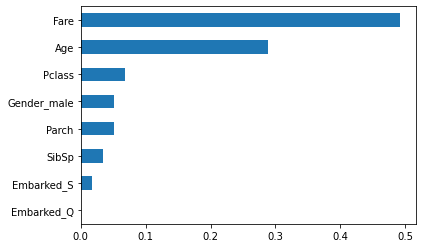

In [118]:
ser=pd.Series(ada_boosting.feature_importances_,index=x.columns)
ser.sort_values().plot(kind='barh')

# All result:

In [138]:
df1=pd.DataFrame(result,index=index)
df1

accuracy_train  accuracy_test
Logistic_model                                     0.811798       0.754190
Logistic_model_with_Normalization                  0.804775       0.759777
Logistic_model_with_Standardization                0.811798       0.759777
KNN_simple_model                                   0.803371       0.653631
KNN_simple_model_with_hyp(rscv)                    0.990169       0.692737
KNN_Standardized_Model                             0.866573       0.782123
KNN_Standardized_Model_with_hyp(gcv)               0.848315       0.793296
KNN_Normalized_Model                               0.862360       0.614525
KNN_Normalized_Model_with_hypertunning             0.990169       0.770950
Decision tree model                                0.990895       0.775862
Decision tree model_with hyp(rscv)                 0.889226       0.797414
Random forest model                                0.990895       0.797414
Ada Boost model without hyp                        0.856287       0.798206
ada boost with hyp(rscv)                           0.856287       0.784753
Random forest model with hypertunning(rscv)        0.854790       0.820628

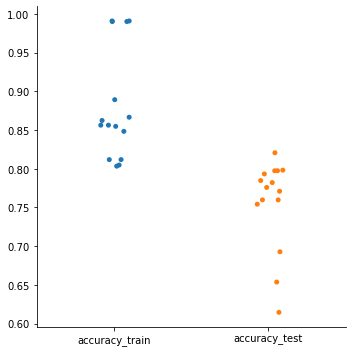

In [139]:
sns.catplot(data=df1)

<AxesSubplot:ylabel='Proportion'>

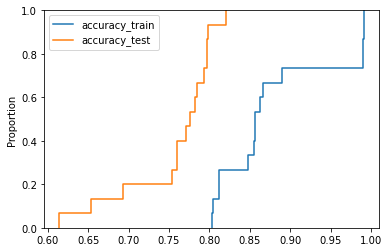

In [140]:
 sns.ecdfplot(data=df1)

<AxesSubplot:>

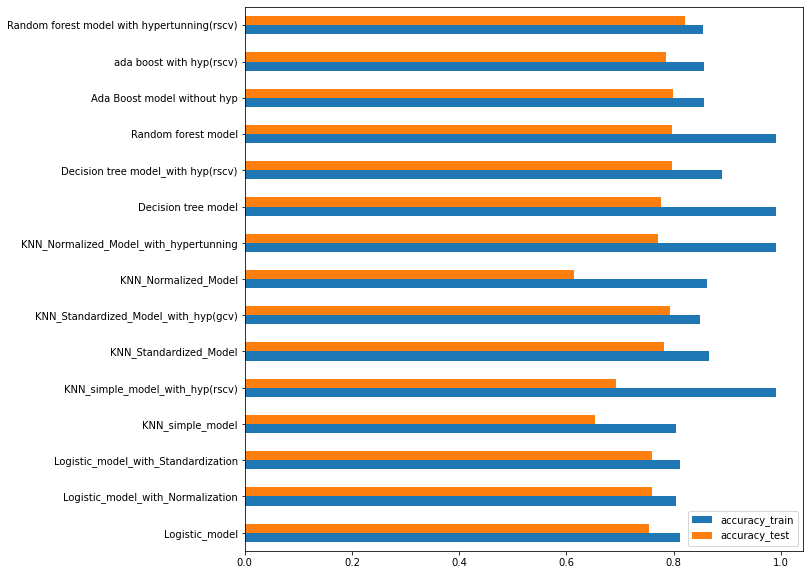

In [141]:
df1.plot(kind='barh',figsize=(10,10))

# result:


## Random forst with hypertunning give best result for titanic prediction



## Test accuracy =82.06
## Train accuracy=85.47

## testing on single row

In [123]:
df.head(1).T

0
Survived       No
Pclass        3.0
Age          22.0
SibSp         1.0
Parch         0.0
Fare         7.25
Gender_male   1.0
Embarked_Q    0.0
Embarked_S    1.0

In [124]:
array=np.zeros(8)
array

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [125]:
json_data={'Gender_male':{'male':1,'female':0},
           'columns':list(x.columns)}

In [126]:
Pclass=1
Age=45
Sibsp=1
Parch=0
Fare=7.12
Gender_male="male"
Embarked_Q='Q'

In [127]:
Embarked='Embarked_'+"Q"
Embarked_index=np.where(x.columns==Embarked)[0][0]
Embarked_index

6

In [128]:
array[0]=Pclass
array[1]=Age
array[2]=Sibsp
array[3]=Parch
array[4]=Fare
array[5]=json_data['Gender_male'].get(Gender_male)
array[Embarked_index]=1

In [142]:
pred=random_model.predict([array])[0]
pred

'No'

In [143]:
with open ('random_model.pkl','wb') as m:
    pickle.dump(random_model,m)

In [144]:
with open('column_data','w') as j:
    json.dump(json_data,j)